In [5]:
import pandas as pd

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df = pd.read_csv('/content/labeledTrainData.tsv', sep='\t')
df['missing_column_1'] = 'missing_value_1'
df['missing_column_2'] = 'missing_value_2'

In [8]:
df


,id,sentiment,review,missing_column_1,missing_column_2
0,5814_8,1,With all this stuff going down at the moment w...,missing_value_1,missing_value_2
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",missing_value_1,missing_value_2
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,missing_value_1,missing_value_2
3,3630_4,0,It must be assumed that those who praised this...,missing_value_1,missing_value_2
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,missing_value_1,missing_value_2
...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,missing_value_1,missing_value_2
24996,5064_1,0,I don't believe they made this film. Completel...,missing_value_1,missing_value_2
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",missing_value_1,missing_value_2
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,missing_value_1,missing_value_2


In [9]:
df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,id,sentiment,review,missing_column_1,missing_column_2
0,5814_8,1,With all this stuff going down at the moment w...,missing_value_1,missing_value_2
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",missing_value_1,missing_value_2
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,missing_value_1,missing_value_2
3,3630_4,0,It must be assumed that those who praised this...,missing_value_1,missing_value_2
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,missing_value_1,missing_value_2
...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,missing_value_1,missing_value_2
24996,5064_1,0,I don't believe they made this film. Completel...,missing_value_1,missing_value_2
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",missing_value_1,missing_value_2
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,missing_value_1,missing_value_2


In [ ]:
def clean_review(review):
  str=''.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

In [ ]:
df['review']=df['review'].apply(clean_review)

In [ ]:
#wordcloud
from wordcloud import WordCloud

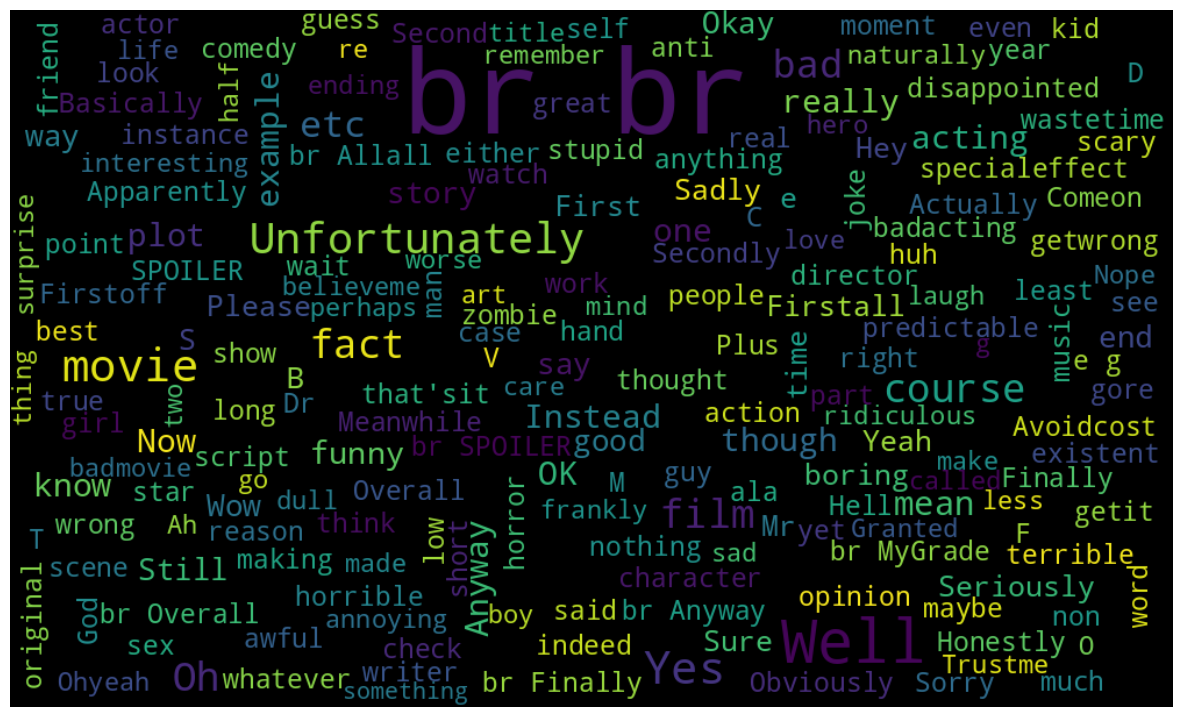

In [ ]:
reviews=''.join(word for word in df['review'] [df['sentiment']==0].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

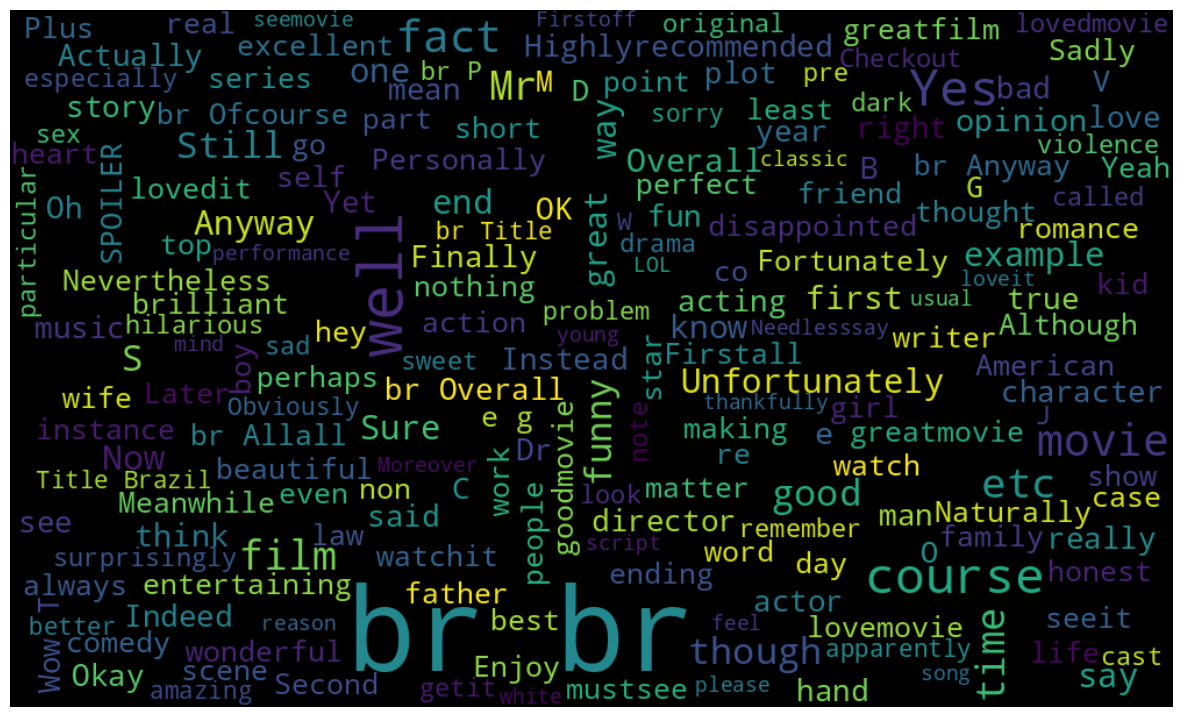

In [ ]:
reviews=''.join(word for word in df['review'] [df['sentiment']==1].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)

In [10]:
reviews=cv.fit_transform(df['review']).toarray()

In [11]:
df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model=LogisticRegression()

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
reviews_train , reviews_test , sent_train , sent_test=train_test_split(reviews,df['sentiment'],test_size=0.2)

In [19]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [21]:
predict=model.predict(reviews_test)

In [28]:
!pip install scikit-learn


In [34]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [31]:
cm=confusion_matrix(sent_test,predict,labels=model.classes_)

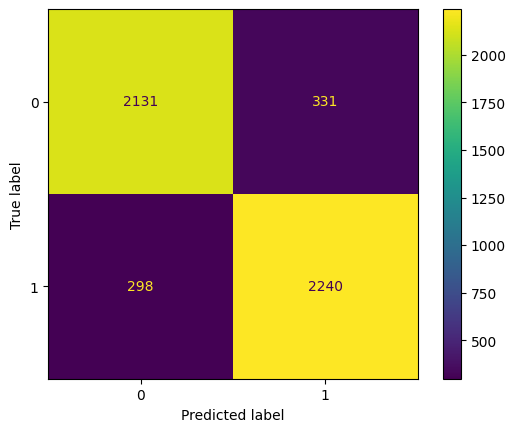

In [36]:
display =ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [37]:
import pickle as pk
pk.dump(model,open('model.pkl','wb'))